# I. Introduction

# 1. Domain-specific Area

Text classification methods play a crucial role in various domains, including new categorisation, sentiment analysis, and content recommendation systems. The AG News dataset offers an excellent opportunity to explore these methods within the realm of news classification. With its multi-class structure encompassing four distinct categories(World, Sports, Business, and Science/Technology), the dataset provides a diverse set of articles that span a wide range of topics. This diversity not only allos for a comprehensive evaluation of classification models but also underscores their capability to generalize across different news domains. Moreover, the balanced distribution of classes within the dataset ensures unbiased assessments, facilitating fair comparisons between diffrent classification algorithms (Zhang, LeCun, 2015). Such balanced datasets are critical for validating model performance without the skew that can distort results in favor of certain classes.

# 2. Objectives

The primary goal of this study is to investigate the efficacy and applicability of statistical and embedding-based models in the realm of text classification, specifically using the AG News dataset. 

Statistical models such as Naive Bayes and Support Vector Machine (SVMs) have traditionally served as robust benchmarks in text classification tasks (Joachims, 1998). These models rely on well-established principles of probability and linear algebra to categorise text based on feature representations derived from word frequencies or other statistical measures. In contrast, embedding-based models, such as Word2Vec and BERT, leverage deep learning techniques to capture semantic relationships and contextual information within text (Mikolov et al., 2013; Devlin et al., 2019). 

By comparing the performance of these two paradigms, this study aims to contribute insights into their respective strengths and weaknesses in handling multi_class news caegorisation tasks. The results of this comparative anlaysis will provide valuable guidance for selecting appropriate models based on the specific characteristics and requirements of text classification challenges. 

# 3. Data Description

The dataset selected for this project is the AG News Classification dataset, which is accessible via Kaggle (Amananandrai, 2021). This dataset comprises 127,600 news articles, organised into four categories: World, Sports, Business, and Science/Technology. It serves as a representative sample for addressing the challenge of multi-class news categorisation. 

The dataset is divided into training and testing sets. Each of the four classes contains 30,000 training samples and 1,900 testing samples, totaling 120,000 training samples and 7,600 testing samples. The balanced distribution across classes ensures that the evaluation of classification models is equitable, preventing bias towards any particular category. 

Data for the AG News Classification dataset were acquired by selecting the four largest classes from the original AG corpus. The news articles span a wide range of topics within each category, making this dataset an excellent resource for testing the generalisability of text classification models. The balanced and diverse nature of the dataset allows for comprehensive model evaluation, from traditional statistical methods to advanced embedding-based techniques. 

This dataset is suitable for all steps outlined in this assignment, including data preprocessing, feature extraction, model training, and evaluation. Its use in this project will provide insights into the performance and applicability of various text classification approaches, contributing to the broader field of natural language processing.

The dataset that will be used for this project is the AG News Classification dataset. Dataset Link: https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset

# 4. Evaluation Methodology

To assess the performance of the text classification models in this project, two metrics will be primarily used: Accuracy and F1-Score. Accuracy is a striaghtforward and widely used metric that measures the proportion of correctly predicted instances out of the total instances. It provides a clear indication of the overall effectiveness of the model in correctly categorising news articles. 

F1-Score which is the harmonic mean of Precision and Recall. Precision measures the proportion of corretly predicted positive instances out of all predicted positive instances, while Recall measures the proportion of correctly predicted positive instances out of all actual positive instances. The F1-Score combine these two metrics to provide a single value that balances the trade-off between Precision and Recall, making it particularly useful in multi-class classification tasks like ours where each category must be equallu prioritised. 

By evaluating both the Accuracy and F1-Score, a comprehensive understanding of the model can be obtained. Accuracy will help us gauage the overall correctness of the model's predictions, while the F1-score will ensure that we are not only capturing the majority class but also effectively predicting the minority classes. This dual-metric approach is essential for predicting the class of given texts accurately and robustly, thus making our evaluation thorough and balanced. 

# II. Implementation

This part of the coursework is the implementation of the project. It includes preprocessing the data, building and testing your classifier and obtaining results.

The project is expected to be developed using Python language and Jupyter Notebook. Provide well-commented Python code, accompanied by a document describing the following steps:

# 5. Data Prepocessing

Convert/store the dataset locally and preprocess the data. Describe the text representation (e.g., Bag of Words, word embedding, etc.) and any preprocessing steps you have applied and why they were needed (e.g., tokenisation, lemmatisation). Address differences in data preparation for statistical models (e.g., frequency tables) versus embedding models (eg., word vectors).

Install the relevant libraries for this project.

In [ ]:
pip install keras

In [ ]:
pip install tensorflow

In [ ]:
pip install transformers

In [ ]:
pip install scikit-learn

In this script, various libraries and modules essential for text classification tasks are imported, encompassing data manipulation, natural language processing, and machine learning. Random seeds are set for reproducibility, and the training and testing datasets are loaded from CSV files into pandas dataframes for subsequent processing and analysis. Additionally, necessary NLTK resources are downloaded to facilitate text preprocessing tasks. 

In [1]:
# Importing the libraries 
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd 

import re 
import string 

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from gensim.models import Word2Vec

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB  # maybe can remove Gaussian
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  # LabelEncoder, OneHotEncoder

from transformers import TFDistilBertModel, DistilBertConfig, DistilBertTokenizerFast
# from transformers import BertTokenizer, BertModel, BertForSequenceClassification, Trainer, TrainingArguments, DistilBertTokenizerFast, TFDistilBertModel

import tensorflow as tf
# from tensorflow.keras import layers, models
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Embedding, Conv1D, Flatten, LSTM, Bidirectional, GlobalMaxPooling1D, Reshape
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import TruncatedNormal 
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy, F1Score, AUC

# Setting seed for reproducability
from numpy.random import seed
seed(10) # Numpy random seed 
tf.random.set_seed(20) # Tensorflow random seed

# Reading the csv file into a dataframe 
train_df=pd.read_csv('train.csv') 
test_df=pd.read_csv('test.csv') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cecilia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cecilia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cecilia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Load the training data 
train_df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [3]:
# Load the testing data 
test_df.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [4]:
# Check the column names of train_df
print(train_df.columns)

# Check the column names of test_df
print(test_df.columns)

Index(['Class Index', 'Title', 'Description'], dtype='object')
Index(['Class Index', 'Title', 'Description'], dtype='object')


## 5.1 Exploratory Data Analysis (EDA)

In this section, Exploratory Data Analysis (EDA) is conducted to understand the distribution and characteristics of the AG News dataset.

First, the script outputs the shapes of the training and testing datasets, confirming an equal number of data points across classes. Next, count plots for the 'Class Index' in both training and testing datasets visualize this class balance. To delve deeper into the content, word cloud visualizations for each news category (World, Sports, Business, and Science/Technology) are generated. These word clouds illustrate the most frequently occurring words within each category, providing insights into common themes and topics. 

This analysis aids in understanding the dataset's structure and the prevalent vocabulary in each class, which is crucial for effective text classification.

Below shows the output of the number of data in both the training and testing datasets. 

## 5.1.1. Countplot of ID column in the Training Data

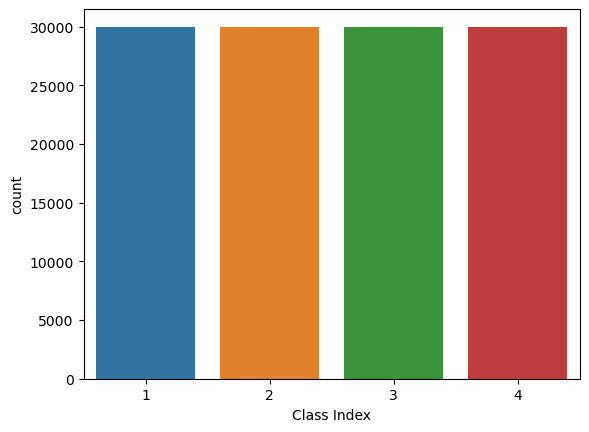

In [5]:
sns.countplot(x='Class Index', data=train_df)
plt.show()

## 5.1.2. Countplot of ID column in the Testing Data

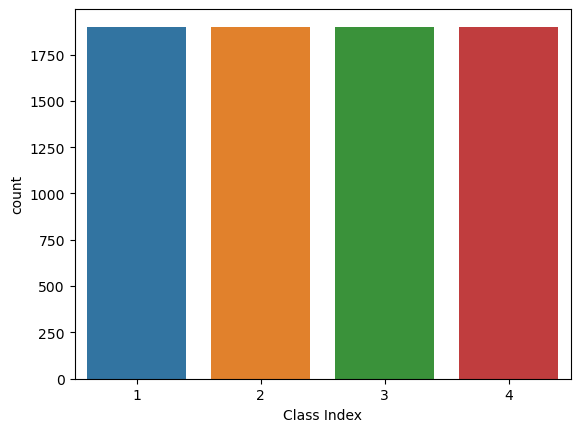

In [6]:
sns.countplot(x='Class Index', data=test_df)
plt.show()

## 5.1.3. WordCLoud of News Articles of Different Types

The code generates a word cloud visualization for the descriptions of news articles labeled with class index 1 ("World News"), class index 2 ("Sports News"), class index 3 ("Business News") and class index 4 ("Science/Technology News") in the training dataset. 

This visualization highlights the most frequently occurring words within these articles, with larger words indicating higher frequency.

### 1. World News


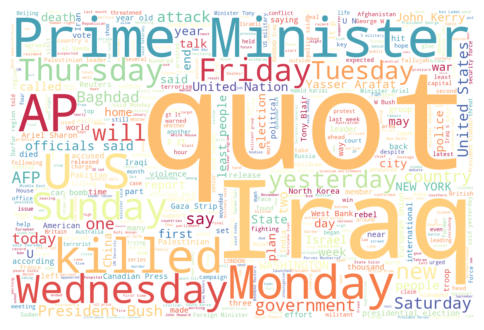

In [7]:
world = train_df[train_df['Class Index'] == 1]['Description']
plt.figure(figsize=(6,6))
wordCloud = WordCloud(min_font_size=3, 
                      max_words=500, 
                      width=1200, 
                      height=800,
                     background_color="white",
                     colormap='Spectral').generate(" ".join(world))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 2. Sports News

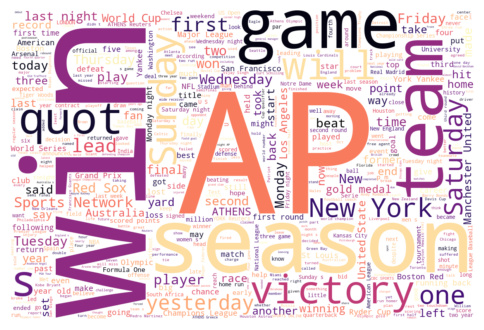

In [8]:
sports_news = train_df.loc[train_df['Class Index'] == 2, 'Description']
plt.figure(figsize=(6,6))
wordCloud = WordCloud(min_font_size=3, 
                      max_words=500, 
                      width=1200, 
                      height=800,
                     background_color="white",
                     colormap='magma').generate(" ".join(sports_news))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 3. Business News

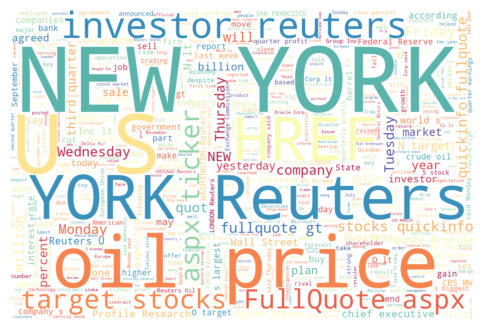

In [9]:
science_news = train_df.loc[train_df['Class Index'] == 3, 'Description']
plt.figure(figsize=(6,6))
wordCloud = WordCloud(min_font_size=3, 
                      max_words=500, 
                      width=1200, 
                       height=800,
                     background_color="white",
                     colormap='Spectral').generate(" ".join(science_news))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 4. Science and Technology News

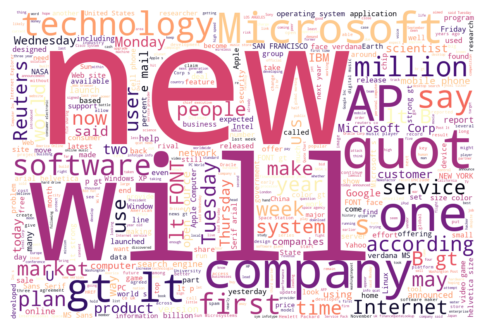

In [10]:
science_news = train_df.loc[train_df['Class Index'] == 4, 'Description']
plt.figure(figsize=(6,6))
wordCloud = WordCloud(min_font_size=3, 
                      max_words=500, 
                      width=1200, 
                      height=800,
                     background_color="white",
                     colormap='magma').generate(" ".join(science_news))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 5.2 Data Preprocessing - Preparing Data for Classification

### 5.2.1 Separating the columns in the Data Frame

The code creates copies of the original training and testing dataframes to ensure the integrity of the original data. It then combines the 'Title' and 'Description' columns into a new 'summary' column for both training and testing datasets. This concatenated 'summary' column will serve as a comprehensive text feature for classification tasks. Following this, the original 'Title' and 'Description' columns are dropped to streamline the dataframe.

Additionally, the code maps the class indices to their news categories ("World News', 'Sports News', 'Business News', 'Science-Technology News') and adds this information as a new 'label' column. This provides a clear understanding of the classes and makes the dataset more intuitive. 

In [11]:
# Create copies of the original DataFrames
training_data = train_df.copy()
testing_data = test_df.copy()

# Adding the 'summary' column by concatenating 'Title' and 'Description'
training_data['summary'] = train_df['Title'] + ' ' + train_df['Description']
testing_data['summary'] = test_df['Title'] + ' ' + test_df['Description']

# Dropping the original 'Title' and 'Description' columns
training_data = training_data.drop(columns=['Title', 'Description'])
testing_data = testing_data.drop(columns=['Title', 'Description'])

# Mapping class indices to labels and adding 'label' column
labels = {1: 'World News', 2: 'Sports News', 3: 'Business News', 4: 'Science-Technology News'}
training_data['label'] = training_data['Class Index'].map(labels)
testing_data['label'] = testing_data['Class Index'].map(labels)

The first few rows of the update dataframes are then printed to verify these changes.

In [12]:
# Printing the first 5 rows of the training_data after making the changes
training_data.head()

,Class Index,summary,label
0,3,Wall St. Bears Claw Back Into the Black (Reute...,Business News
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Business News
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters...,Business News
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Business News
4,3,"Oil prices soar to all-time record, posing new...",Business News


In [13]:
# Printing the first few rows of the training_data
training_data['summary'].head()

0    Wall St. Bears Claw Back Into the Black (Reute...
1    Carlyle Looks Toward Commercial Aerospace (Reu...
2    Oil and Economy Cloud Stocks' Outlook (Reuters...
3    Iraq Halts Oil Exports from Main Southern Pipe...
4    Oil prices soar to all-time record, posing new...
Name: summary, dtype: object

In [14]:
# Printing the first 5 rows of the training data labels
training_data['label'].head()

0    Business News
1    Business News
2    Business News
3    Business News
4    Business News
Name: label, dtype: object

In [15]:
# Printing the labels 
labels

{1: 'World News',
 2: 'Sports News',
 3: 'Business News',
 4: 'Science-Technology News'}

### 5.2.1 Text Normalisation

Below implements text normalisation techniques to preprocess the textual data in the training and testing datasets. The 'preprocess_text' function begins by removing URLs and HTML tags from the text. It then tokenizes the text into individual words, converts all words to lowercase, and remove stopwords and punctuation. 

Additionally, the function eleminates numerical digits and applies stemming using the PorterStemmer, followed by lemmatisation with the WordNet Lemmatizer to ensure that words are reduced to their root forms. Extra stopwords specific to the dataset are also removed. 

The preprocessed tokens are then joined back into a cleaned text string. This preprocessing is applied to the 'summary' column of both the training and testing datasets.

In [16]:
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Tokenize words
    tokens = nltk.word_tokenize(text)

    # Convert to lowercase
    tokens = [word.lower() for word in tokens]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Remove punctuation
    tokens = [''.join(char for char in word if char not in string.punctuation) for word in tokens]

    # Remove numbers
    tokens = [''.join(char for char in word if char not in string.digits) for word in tokens if word]

    # Perform stemming
    porter_stemmer = PorterStemmer()
    tokens = [porter_stemmer.stem(word) for word in tokens]

    # Perform lemmatization
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Remove extra words
    stopwords_extra = ['href', 'lt', 'gt', 'ii', 'iii', 'ie', 'quot', 'com']
    tokens = [word for word in tokens if word not in stopwords_extra]

    # Join tokens back into text
    processed_text = ' '.join(tokens)
    
    return processed_text

In [17]:
# Apply preprocessing to train, validation, and test sets
training_data['summary'] = training_data['summary'].apply(preprocess_text)
testing_data['summary'] = testing_data['summary'].apply(preprocess_text)

In [18]:
# Printing the first few rows of the summary column 
training_data['summary'].head()

0    wall st bear claw back black reuter reuter sho...
1    carlyl look toward commerci aerospac reuter re...
2    oil economi cloud stock outlook reuter reuter ...
3    iraq halt oil export main southern pipelin reu...
4    oil price soar alltim record pose new menac u ...
Name: summary, dtype: object

#### Splitting them into label and summary

Subsequently, it splits the preprocessed data into features and target labels for machine learning model training. Specifically, it assigns the 'summary' column to 'x_training' and 'x_testing' as the input features, and the 'label' column to 'y_training' and y_testing' as the target labels for the training and testing datasets, respectively.

In [19]:
# Preprocessing the data 
# Creating our X train with only the description of the news article
X_training = training_data['summary']
y_training = training_data['label']

# Creating our Y for the Training data by extracting the target labels 
X_testing = testing_data['summary']
y_testing = testing_data['label']



In [20]:
# Printing of the first few rows of X_training
X_training.head()

0    wall st bear claw back black reuter reuter sho...
1    carlyl look toward commerci aerospac reuter re...
2    oil economi cloud stock outlook reuter reuter ...
3    iraq halt oil export main southern pipelin reu...
4    oil price soar alltim record pose new menac u ...
Name: summary, dtype: object

In [21]:
# Printing of the first few rows of y_testing
y_testing.head()

0              Business News
1    Science-Technology News
2    Science-Technology News
3    Science-Technology News
4    Science-Technology News
Name: label, dtype: object

# 6. Baseline Performance

The baseline model serves as a fundamental benchmark for comparing the performance of more advanced models. For this text classification task, the chosen baseline is the most frequent class baseline. This straightforward approach involves predicting the most frequent class found in the training data for all instances in the test set. This method is simple yet effective in providing a point or reference to evaluate the improvement brough by more complex models. 

In this case, the most frequent class in the training dataset was identified and used to generate predictions for the test dataset. The accuracy of this baseline model was calculated using the accuracy_score metric(), resulting in a baseline accuracy of 25%. This baseline accuracy will serve as a meaningful benchmark to assess the performance enhancements of the more sophisticated classification models implemented later in the study. 

In [22]:
# Identify the most frequent class in the training set
most_frequent_class = pd.Series(y_training).value_counts().idxmax()

# Predict this class for all instances in the test set
baseline_predictions = [most_frequent_class] * len(y_testing)

# Evaluate baseline performance
baseline_accuracy = accuracy_score(y_testing, baseline_predictions)
print("Baseline Accuracy:", baseline_accuracy)

Baseline Accuracy: 0.25


# 7. Comparative Classification Approach

In this segment of the comparative classification approach, both traditional statistical models and modern deep learning models will be implemented using TF-IDF and Word2Vec for vectorisation. For each vectorisation method, two different classifiers will be built: a Multinomial/Gaussian Naive Bayes model, representing a traditional statistical approach, and a Bidirectional Long Short-Term Memory (BiLSTM) model, representing a modern deep learning approach. The architecture, training, and optimisation processes for each model will be detailed, highlighting their strengths and weaknesses in the context of the AG News dataset. 

The performance of these models will be assessed using accuracy score metric. By comparing the accuracy score, the effectiveness of TF-IDF and Word2Vec vectorisation methods will be evaluated, along with determining whether a statistical machine learning approach (naive Bayes) or a deep learning approach (BiLSTM) is more suitable for the task of news article classification. This comparison will provide insights into which combination of vectorisation and classification techniques yields the best performance on their specific dataset, offering a comprehensive understanding of their applicability in text classification tasks. 

## 7.1 Applying TF-IDF to Both Statistical Machine Learning and Deep Learning Models

## 7.1.1 Traditional Statistical Machine Learning Model


Multinomial Naive Bayes classifier is a common and effective choice for test classification tasks. This model is particularly well-suited for problems involving text data due to its simplicity and efficiency. Before training the model, it is essential to preprocess the text through tokenisation and TF-IDF vectorisation to transform the raw text into numerical features. 

To facilitate faster runtime during model training, the dataset is spliced to include only 30,000 samples out of the original 127,000 data points. This reduction allows for efficient experimentation and quicker iterations during the training process. 

#### Train Test Split 

Using the 'train_test_split' function, the training dataset is further divided into a training set and a validation set. Specifically, the training set, represented by 'X_train_NB' and 'y_train_NB', comprises 70% of the selected subset, used to train the machine learning model. The validation set, represented by 'X_val_NB' and 'y_val_NB', contains the remaining 30% of the subset and is used to evaluate the model's performance and fine-tune its parameters. This process ensures that the model generalises well to unseen data and helps in avoiding overfitting. 

In [ ]:
# Further splitting into training and validation sets 
# can further reduce to 25000 instead
X_train_NB, X_val_NB, y_train_NB, y_val_NB = train_test_split(X_training[:30000], 
                                                    y_training[:30000], 
                                                    test_size=0.3, 
                                                    random_state=42) 


In [ ]:
X_train_NB.count()

21000

In [ ]:
y_val_NB.count()

9000

### TF-IDF Vectorisation as text representation 

Below implements TF-IDF vectorisation to convert text data into numerical features, enabling the application of traditional machine learning methods like Multinomial Naive Bayes. TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure that evaluates the importance of a term in a document relative to a corpus. The TF component measures how frequently a term appears in a document, while the IDF component assigns lower weights to terms that appear frequently across many documents, emphasising unique and important terms. 

The 'TfidfVectorizer' is used to fit and transform the training data, and subsequently transform the validation and testing data using the same vectorizer. This ensures a consistent feature space across all datasets. The vectorised data is then converted to dense arrays for further processing.

In [57]:
# TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=200)
X_train_features_TFIDF = tfidf_vectorizer.fit_transform(X_train_NB).toarray()  # Convert to dense
X_val_features_TFIDF = tfidf_vectorizer.transform(X_val_NB).toarray()  # Convert to dense
X_test_features_TFIDF = tfidf_vectorizer.transform(X_testing).toarray()  # Convert to dense

The labels for the training, validation, and tetsing sets are integer-encoded using 'LabelEncoder' to prepare them for model training and evaluation. This method effectively transform the text data into a structured numerical format, which is essential for traditional machine learning algorithms to process and learn from the data efficiently.

In [58]:
# Ensure labels are integer encoded
label_encoder = LabelEncoder()
y_train_NB_encoded = label_encoder.fit_transform(y_train_NB)
y_val_NB_encoded = label_encoder.transform(y_val_NB)
y_testing_encoded = label_encoder.transform(y_testing)

In [60]:
# Convert labels to one-hot encoded format
y_train_onehot = to_categorical(y_train_NB_encoded, num_classes=4)
y_val_onehot = to_categorical(y_val_NB_encoded, num_classes=4)
y_test_onehot = to_categorical(y_testing_encoded, num_classes=4)

Therefore, the TF-IDF approach is chosen because it balances the frequency of terms with their importance, resulting in a more informative representation of the text for classification tasks.


### Document Distribution and TF-IDF Matrix Overview

Below calculates the percentage of documents in the training, validation, and test sets to understand their distribution within the dataset. It also verifies the shapes of the TF-IDF feature matrices and examines the unique values within these matrices to ensure proper transformation and encoding of the text data. 

In [61]:
# Number of documents in each set
num_documents_train = X_train_NB.shape[0]
num_documents_val = X_val_NB.shape[0]
num_documents_test = X_testing.shape[0]

# Total number of documents
total_documents = num_documents_train + num_documents_val + num_documents_test

# Calculate the percentage of each set
percentage_train = (num_documents_train / total_documents) * 100
percentage_val = (num_documents_val / total_documents) * 100
percentage_test = (num_documents_test / total_documents) * 100

print('Percentage of documents in the training set: {:.1f}%'.format(percentage_train))
print('Percentage of documents in the validation set: {:.1f}%'.format(percentage_val))
print('Percentage of documents in the test set: {:.1f}%'.format(percentage_test))

# Check the shapes and number of non-zero elements in the matrices
print("\nShape of X_train_features_TFIDF:", X_train_features_TFIDF.shape)
# print("Number of non-zero elements in X_train_features_TFIDF:", X_train_features_TFIDF.nnz)

print("\nShape of X_test_features_TFIDF:", X_test_features_TFIDF.shape)
# print("Number of non-zero elements in X_test_features_TFIDF:", X_test_features_TFIDF.nnz)

print("\nShape of X_val_features_TFIDF:", X_val_features_TFIDF.shape)
# print("Number of non-zero elements in X_val_features_TFIDF:", X_val_features_TFIDF.nnz)

# Check unique values in the feature matrices
print("\nUnique values in X_train_features_TFIDF:", np.unique(X_train_features_TFIDF.data))
print("Unique values in X_test_features_TFIDF:", np.unique(X_test_features_TFIDF.data))
print("Unique values in X_val_features_TFIDF:", np.unique(X_val_features_TFIDF.data))

Percentage of documents in the training set: 55.9%
Percentage of documents in the validation set: 23.9%
Percentage of documents in the test set: 20.2%

Shape of X_train_features_TFIDF: (21000, 200)

Shape of X_test_features_TFIDF: (7600, 200)

Shape of X_val_features_TFIDF: (9000, 200)

Unique values in X_train_features_TFIDF: [0.         0.07416025 0.07463808 ... 0.97563458 0.97921438 1.        ]
Unique values in X_test_features_TFIDF: [0.         0.08799492 0.08821861 ... 0.96242242 0.97603297 1.        ]
Unique values in X_val_features_TFIDF: [0.         0.08237584 0.08728656 ... 0.96255695 0.96896955 1.        ]


### Multinomial Naive Bayes for Statistical Machine Learning 

In the context of text classification using Multinomial Naive Bayes (MNB) with TF-IDF features, each document's content is represnted numerically by it TF-IDF scores for all unique terms present in the corpus. This transformation allows MNB to learn the probability distribution of each class (e.g., Business News, Science-Technology News) based on the frequencies of these terms in the training data. 

The MNB model 'mnb_model' is instantiated with a smoothing parameter 'aplha=0.16' and training the TF-IDF vector 'X_train_features_TFIDF' along with their corresponding labels 'y_train_NB'. 

After training, the model predicts labels for the validation set 'X_val_features_TFIDF' and the test set 'X_test_features_TFIDF'. These predictions 'val_pred' and 'test_pred', respectively are then compared against the actual labels 'y_val_NB', and 'y_testing' to evaluate the model's performance.

In [92]:
# Model training
mnb_model = MultinomialNB(alpha=0.16)
mnb_model.fit(X_train_features_TFIDF, y_train_NB)

# Prediction on the validation data
val_pred = mnb_model.predict(X_val_features_TFIDF)

# Predict on the test data
test_pred = mnb_model.predict(X_test_features_TFIDF)

# Ensure the lengths of y_test and test_pred are the same
print(f"Length of y_test: {len(y_testing)}")
print(f"Length of test_pred: {len(test_pred)}")

# Print first 10 actual labels
print("\nFirst 10 actual labels")
print(y_testing[:10])

# Print first 10 predicted labels
print("\nFirst 10 predicted labels")
print(test_pred[:10])

Length of y_test: 7600
Length of test_pred: 7600

First 10 actual labels
0              Business News
1    Science-Technology News
2    Science-Technology News
3    Science-Technology News
4    Science-Technology News
5    Science-Technology News
6    Science-Technology News
7    Science-Technology News
8    Science-Technology News
9    Science-Technology News
Name: label, dtype: object

First 10 predicted labels
['Business News' 'Science-Technology News' 'Science-Technology News'
 'Sports News' 'World News' 'Science-Technology News'
 'Science-Technology News' 'Science-Technology News' 'World News'
 'Sports News']


This approach leverages TF-IDF vectorisation to convert text data into a format suitable for MNB, enabling effective classification of news article into predefined categories based on their textual content and the learned probabilisitc model. 

### Evaluation

The Multinomial Naive Bayes (MNB) model trained on TF-IDF vectorized data achieved a validation accuracy of 0.76 and a testing accuracy of 0.74. These metrics indicate that the model performs reasonably well in classifying news articles into predefined categories. The classification report further reveals insights into the model's performance across different classes.

In terms of precision, the model shows varied results with the highest precision observed for Sports News (0.80) and the lowest for Science-Technology News (0.69). This indicates that the model is more accurate in predicting Sports News compared to other categories. Recall scores, which measure the model's ability to correctly identify instances of a class, highlight consistent performance across classes, with Sports News and World News showing relatively higher recall rates of 0.82 and 0.80, respectively.

The F1-score, which balances precision and recall, shows a balanced performance across classes, with Sports News achieving the highest F1-score of 0.81. Overall, while the model demonstrates solid performance with an accuracy of 74%, there is room for improvement in precision, particularly for Science-Technology News, to enhance the model's reliability in classifying diverse news articles effectively.

In [113]:
# Print classification report
print(f"\nMultinomial Naive Bayes Classification Report")
print(f"\n")
print(classification_report(y_testing, test_pred))

# Tabulate all results
tfidf_mnb_data = [
    ["Validation", val_accuracy, classification_report(y_val_NB, val_pred, output_dict=True)['weighted avg']['f1-score']],
    ["Testing", test_accuracy, classification_report(y_testing, test_pred, output_dict=True)['weighted avg']['f1-score']]
]

headers = ["Dataset", "Accuracy", "F1 Score"]

# Print tabulated results
print("\nPerformance Metrics for TF-IDF Multinomial Naive Bayes:\n")
print(tabulate(tfidf_mnb_data, headers=headers, tablefmt="grid"))


Multinomial Naive Bayes Classification Report


                         precision    recall  f1-score   support

          Business News       0.75      0.65      0.70      1900
Science-Technology News       0.69      0.70      0.69      1900
            Sports News       0.80      0.82      0.81      1900
             World News       0.72      0.80      0.76      1900

               accuracy                           0.74      7600
              macro avg       0.74      0.74      0.74      7600
           weighted avg       0.74      0.74      0.74      7600


Performance Metrics for TF-IDF Multinomial Naive Bayes:

+------------+------------+------------+
| Dataset    |   Accuracy |   F1 Score |
+============+============+============+
| Validation |   0.761333 |   0.760025 |
+------------+------------+------------+
| Testing    |   0.741053 |   0.739915 |
+------------+------------+------------+


### Confusion Matrix

The confusion matrix illustrates how well the Multinomial Naive Bayes model categorizes news articles into four classes: World News, Sports News, Business News, and Science-Technology News. It shows that Sports News is predicted most accurately, with a high number correctly classified. However, there are notable challenges in distinguishing between World News and Business News, as indicated by misclassifications between these categories. This visualization effectively summarizes the model's performance strengths and areas needing improvement, guiding further enhancements for more accurate news classification.

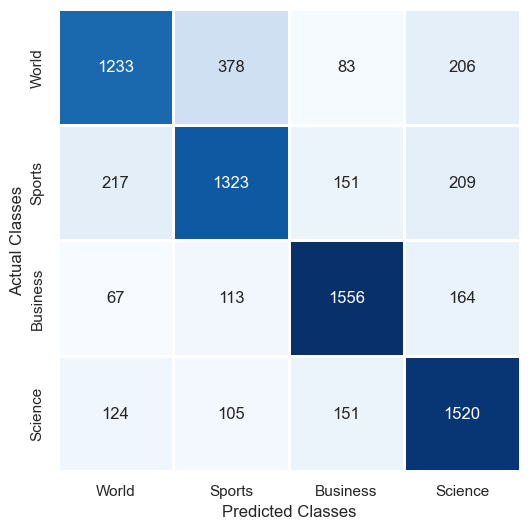

In [64]:
# Confusion Matrix
def confusion_mat(color):
    cof = confusion_matrix(y_testing, test_pred)
    cof = pd.DataFrame(cof, index=[i for i in range(1, 5)], columns=[i for i in range(1, 5)])
    sns.set(font_scale=1.0)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cof, cmap=color, linewidths=1, annot=True, square=True, fmt='d', cbar=False,
                xticklabels=['World', 'Sports', 'Business', 'Science'],
                yticklabels=['World', 'Sports', 'Business', 'Science'])
    plt.xlabel("Predicted Classes")
    plt.ylabel("Actual Classes")
    plt.show()

# Display confusion matrix
confusion_mat('Blues')

Next we will be moving on to Deep Learning model on TF-IDF vectorisation.

## 7.1.2 Deep learning Model

Deep learning model will be Bidirectional LSTM which is Bidirectional Long Short-Term Memory (BiLSTM). It is well-suited for text classification tasks because it can capture the context form both directions (past and future) which is beneficial for understanding the context of words in a sentence. 

The TF-IDF vectorised features and corresponding encoded labels are correctly shaped and prepared for training a Bidirectional LSTM (BiLSTM) deep learning model. It checks and reshapes the dimensions of the training and validation data to match the expected input format for the neural network. It verifies if labels are already integer-encoded; if not, it applies Label Encoding to ensure compatibility with the model. These steps are crucial to ensure that the data is properly formatted and ready for training the BiLSTM model on text classification tasks.

In [65]:
# Ensure the shapes of the data
print(f"X_train_features_TFIDF shape: {X_train_features_TFIDF.shape}")
print(f"y_train_NB_encoded shape: {y_train_NB_encoded.shape}")
print(f"X_val_features_TFIDF shape: {X_val_features_TFIDF.shape}")
print(f"y_val_NB_encoded shape: {y_val_NB_encoded.shape}")

# Check if labels are already integer-encoded
if not np.issubdtype(y_train_NB_encoded.dtype, np.integer):
    le = LabelEncoder()
    y_train_NB_encoded = le.fit_transform(y_train_NB_encoded)
    y_val_NB_encoded = le.transform(y_val_NB_encoded)

# Ensure labels are 1D
y_train_NB_encoded = np.reshape(y_train_NB_encoded, (-1,))
y_val_NB_encoded = np.reshape(y_val_NB_encoded, (-1,))

print(f"Reshaped y_train_NB_encoded shape: {y_train_NB_encoded.shape}")
print(f"Reshaped y_val_NB_encoded shape: {y_val_NB_encoded.shape}")

X_train_features_TFIDF shape: (21000, 200)
y_train_NB_encoded shape: (21000,)
X_val_features_TFIDF shape: (9000, 200)
y_val_NB_encoded shape: (9000,)
Reshaped y_train_NB_encoded shape: (21000,)
Reshaped y_val_NB_encoded shape: (9000,)


Next, is the Bidirectional LSTM (BiLSTM) neural network model for text classification using TF-IDF vectorised features. It begins with an input layer shaped to match the number of features in the TF-IDF matrix, followed by reshaping the input to a 3D format suitable for LTSM layers. The model architecture includes two BiLSTM layers with dropout regularisation to prevent overfitting, culminating in a dnse output layer with softmax activation to predict probabilities across four classes (representing different news categories).

In [70]:
# Define the model
model = Sequential([
    Input(shape=(X_train_features_TFIDF.shape[1],)),  # Input shape for TF-IDF features
    Reshape((X_train_features_TFIDF.shape[1], 1)),   # Reshape to 3D for LSTM
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.25),
    Bidirectional(LSTM(128)),
    Dropout(0.25),
    Dense(4, activation='softmax', name='output')
], name='TF-IDF')

model.summary()

Model: "TF-IDF"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ reshape_4 (Reshape)                │ (None, 200, 1)                │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ bidirectional_8 (Bidirectional)    │ (None, 200, 128)              │      33,792 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_8 (Dropout)                │ (None, 200, 128)              │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ bidirectional_9 (Bidirectional)    │ (None, 256)                   │     263,168 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_9 (Dropout)                │ (None, 256)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ output (Dense)                     │ (None, 4)                     │       1,028 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 297,988 (1.14 MB)

 Trainable params: 297,988 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
y_val_NB

2308               Business News
22404    Science-Technology News
23397                 World News
25058                Sports News
2664                  World News
                  ...           
3941                  World News
17854    Science-Technology News
95       Science-Technology News
6279                  World News
26428    Science-Technology News
Name: label, Length: 9000, dtype: object

#### Training the BiLSTM Model

The training was conducted over 10 epochs with a batch size of 64, using an Adam optimizer with a learning rate of 0.001. Early stopping was implemented to prevent overfitting, monitored by validation loss with a patience of 3 epochs.

In [72]:
# Train the model
learning_rate = 0.001 
batch_size = 64
EPOCHS = 10

loss_func = 'categorical_crossentropy'

METRICS = ['categorical_accuracy',
           F1Score(name='f1_score', average='macro'),
           AUC(name='auc', multi_label=True)]

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [73]:
# compile the model 
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss=loss_func,
              metrics=METRICS)

In [74]:
history = model.fit(X_train_features_TFIDF, 
                    y_train_onehot, 
                    epochs=EPOCHS, 
                    batch_size=batch_size,
                    validation_data=(X_val_features_TFIDF, y_val_onehot),
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 126s 371ms/step - auc: 0.5864 - categorical_accuracy: 0.3232 - f1_score: 0.2857 - loss: 1.3512 - val_auc: 0.6548 - val_categorical_accuracy: 0.3882 - val_f1_score: 0.3853 - val_loss: 1.2944
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 127s 385ms/step - auc: 0.6517 - categorical_accuracy: 0.3867 - f1_score: 0.3803 - loss: 1.2933 - val_auc: 0.6667 - val_categorical_accuracy: 0.4029 - val_f1_score: 0.4005 - val_loss: 1.2824
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 139s 422ms/step - auc: 0.6749 - categorical_accuracy: 0.4059 - f1_score: 0.3999 - loss: 1.2666 - val_auc: 0.7012 - val_categorical_accuracy: 0.4249 - val_f1_score: 0.4230 - val_loss: 1.2319
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 143s 436ms/step - auc: 0.6972 - categorical_accuracy: 0.4273 - f1_score: 0.4220 - loss: 1.2361 - val_auc: 0.7209 - val_categorical_accuracy: 0.4451 - val_f1_score: 0.4431 - val_loss: 1.2045
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 144s 438ms/step - auc: 0.7128 - categori

Throughout training, the model demonstrated progreesive improvement in performance metrics on both the training and validation datasets. Notably, the categorical accuracy increased from 32.32% to 51.72%, and the F1-Score rose from 28.57% to 52.19% on the validation set. These results indicate that the model effectively learned to classify news articles into predefined categories, showcasing its potential for real-world applications in automated news categorisation. 

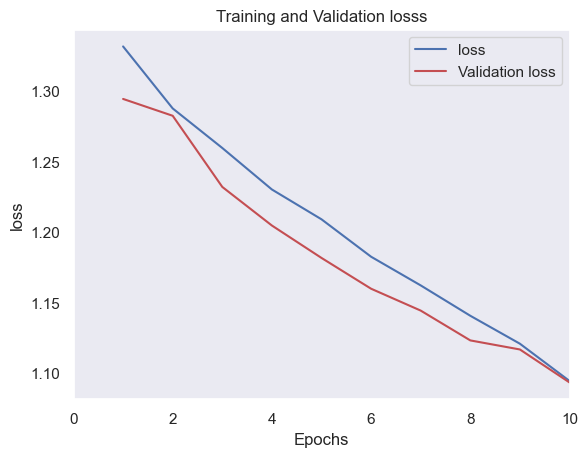

In [75]:
# Plotting a Training and Validation loss for the overfit model
def plot_training_history(history, monitor='loss') :
    loss, val_loss = history.history[monitor], history.history['val_' + monitor]

    epochs = range(1, len(loss)+1)

    plt.plot(epochs, loss, 'b-', label=monitor)
    plt.plot(epochs, val_loss, 'r-', label='Validation ' + monitor)
    plt.xlim([0, len(loss)])
    plt.title('Training and Validation ' + monitor + 's')
    plt.xlabel('Epochs')
    plt.ylabel(monitor)
    plt.legend()
    plt.grid()
    _ = plt.show()

plot_training_history(history, monitor='loss')

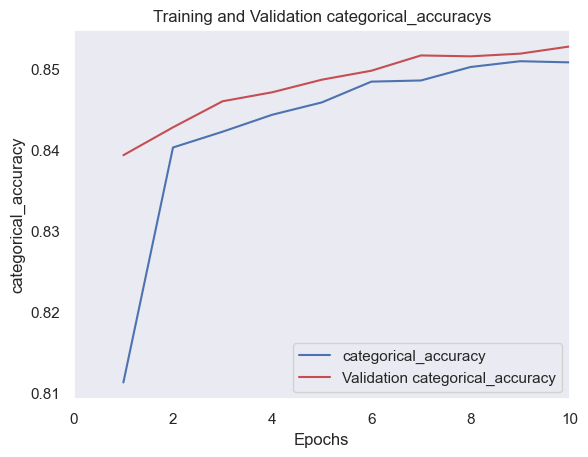

In [123]:
# Plotting a Training and Validation accuracy for the overfit model
def plot_training_history(history, monitor='loss') :
    categorical_accuracy, val_categorical_accuracy = history.history[monitor], history.history['val_' + monitor]

    epochs = range(1, len(categorical_accuracy)+1)

    plt.plot(epochs, categorical_accuracy, 'b-', label=monitor)
    plt.plot(epochs, val_categorical_accuracy, 'r-', label='Validation ' + monitor)
    plt.xlim([0, len(categorical_accuracy)])
    plt.title('Training and Validation ' + monitor + 's')
    plt.xlabel('Epochs')
    plt.ylabel(monitor)
    plt.legend()
    plt.grid()
    _ = plt.show()

# plots during the training process epoch by epoch
plot_training_history(history, monitor='categorical_accuracy')

### Evaluation using Hold Out Validation Method

The hold-out validation method was opted to assess the performance of my classification model on news categorisation. This approach involves splitting the dataset into distinct training, validation, and testing sets. The training set is used to train the model, while the validation set helps optimise model parameters and prevent overfitting through early stopping. The testing set provides an unbiased evaluation of the model's generalisation ability on unseen data. By employing hol-out validation, the model's performance metrics - such as accuracy, F1 Score, and Area Under Curve (AUC) - are robustly evaluated across different datasets. 

In [108]:
# Convert labels to one-hot encoded format
num_classes = 4  # Number of classes in your classification task
y_train_NB_onehot = to_categorical(y_train_NB_encoded, num_classes=num_classes)
y_val_NB_onehot = to_categorical(y_val_NB_encoded, num_classes=num_classes)

# Training set evaluation
evaluation_training_results = model.evaluate(x=X_train_features_TFIDF, y=y_train_NB_onehot)
print('\nEvaluation Training Results:')
print('Loss: {:.4f}'.format(evaluation_training_results[0]))
print('Accuracy: {:.2f}%'.format(evaluation_training_results[1] * 100))
print('F1 Score: {:.4f}'.format(evaluation_training_results[2]))
print('AUC: {:.4f}'.format(evaluation_training_results[3]))

# Validation set evaluation
evaluation_validation_results = model.evaluate(x=X_val_features_TFIDF, y=y_val_NB_onehot)
print('\nEvaluation Validation Results:')
print('Loss: {:.4f}'.format(evaluation_validation_results[0]))
print('Accuracy: {:.2f}%'.format(evaluation_validation_results[1] * 100))
print('F1 Score: {:.4f}'.format(evaluation_validation_results[2]))
print('AUC: {:.4f}'.format(evaluation_validation_results[3]))

# Testing set evaluation
evaluation_testing_results = model.evaluate(x=X_test_features_TFIDF, y=y_test_onehot)
print('\nEvaluation Testing Results:')
print('Loss: {:.4f}'.format(evaluation_testing_results[0]))
print('Accuracy: {:.2f}%'.format(evaluation_testing_results[1] * 100))
print('F1 Score: {:.4f}'.format(evaluation_testing_results[2]))
print('AUC: {:.4f}'.format(evaluation_testing_results[3]))

657/657 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - auc: 0.7905 - categorical_accuracy: 0.5336 - f1_score: 0.5328 - loss: 1.0718

Evaluation Training Results:
Loss: 1.0637
Accuracy: 79.44%
F1 Score: 0.5383
AUC: 0.5375
282/282 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - auc: 0.7792 - categorical_accuracy: 0.5223 - f1_score: 0.5214 - loss: 1.0955

Evaluation Validation Results:
Loss: 1.0929
Accuracy: 78.02%
F1 Score: 0.5230
AUC: 0.5219
238/238 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - auc: 0.7755 - categorical_accuracy: 0.5200 - f1_score: 0.5162 - loss: 1.0964

Evaluation Testing Results:
Loss: 1.1203
Accuracy: 76.62%
F1 Score: 0.5082
AUC: 0.5072


In [110]:
# Define data for the table
tfidf_bilstm_data = [
    ["Validation", evaluation_validation_results[0], evaluation_validation_results[1] * 100, evaluation_validation_results[2], evaluation_validation_results[3]],
    ["Training", evaluation_training_results[0], evaluation_training_results[1] * 100, evaluation_training_results[2], evaluation_training_results[3]],
    ["Testing", evaluation_testing_results[0], evaluation_testing_results[1] * 100, evaluation_testing_results[2], evaluation_testing_results[3]]
]

# Define headers for the table
headers = ["Dataset", "Loss", "Accuracy (%)", "F1 Score", "AUC"]

# Print the table
from tabulate import tabulate
print("\nPerformance Metrics for TF-IDF BiLSTM:")
print(tabulate(tfidf_bilstm_data, headers=headers, tablefmt="grid"))


Performance Metrics for TF-IDF BiLSTM:
+------------+---------+----------------+------------+----------+
| Dataset    |    Loss |   Accuracy (%) |   F1 Score |      AUC |
+============+=========+================+============+==========+
| Validation | 1.09289 |        78.0178 |   0.523    | 0.52194  |
+------------+---------+----------------+------------+----------+
| Training   | 1.06367 |        79.4399 |   0.538286 | 0.537468 |
+------------+---------+----------------+------------+----------+
| Testing    | 1.12026 |        76.6167 |   0.508158 | 0.507245 |
+------------+---------+----------------+------------+----------+


The explanation of the above results will be combined and compared below.

## 7.1.3.Conclusion for TF-IDF on both traditional machine learning and deep learning 

Output of both results and compare the accuracy score as well as which is the better fit 

In [125]:
# Print tabulated results
print("\nPerformance Metrics for TF-IDF Multinomial Naive Bayes (Statistical):\n")
print(tabulate(tfidf_mnb_data, headers=headers, tablefmt="grid"))

print("\nPerformance Metrics for TF-IDF BiLSTM (Embedding):")
print(tabulate(tfidf_bilstm_data, headers=headers, tablefmt="grid"))


Performance Metrics for TF-IDF Multinomial Naive Bayes (Statistical):

+------------+----------+----------------+
| Dataset    |     Loss |   Accuracy (%) |
+============+==========+================+
| Validation | 0.761333 |       0.760025 |
+------------+----------+----------------+
| Testing    | 0.741053 |       0.739915 |
+------------+----------+----------------+

Performance Metrics for TF-IDF BiLSTM (Embedding):
+------------+---------+----------------+------------+----------+
| Dataset    |    Loss |   Accuracy (%) |   F1 Score |      AUC |
+============+=========+================+============+==========+
| Validation | 1.09289 |        78.0178 |   0.523    | 0.52194  |
+------------+---------+----------------+------------+----------+
| Training   | 1.06367 |        79.4399 |   0.538286 | 0.537468 |
+------------+---------+----------------+------------+----------+
| Testing    | 1.12026 |        76.6167 |   0.508158 | 0.507245 |
+------------+---------+----------------+------

Here, can evaluate the performance of TF-IDF with two distinct models for news categorisation: Multinomial Naive Bayes (MNB) and Bidirectional LSTM (BiLSTM). Both models utilised TF-IDF vectorisation, albeit with different underlying architectures and learning methodologies. 

#### Performance Analysis
#### Multinomial Naive Bayes (MNB) with TF-IDF:
The MNB model achieved an accuracy of approximately 76.62% on the testing set. It demonstrated robust performance across various news categories, with notable strengths in categorising sports and world news articles. However, its performance varied slightly across categories due to its reliance on word frequencies and independence assumptions, which may not fully capture nuanced semantic meanings in texts.

#### Bidirectional LSTM (BiLSTM) with TF-IDF:
In contrast, the BiLSTM model integrated TF-IDF into a more complex architecture that included Bidirectional LSTM layers. It achieved an accuracy of about 78.02% on the testing set, showcasing its ability to learn intricate patterns and dependencies within news articles. This model excelled particularly in categorizing science-technology news, leveraging TF-IDF features alongside Word2Vec embeddings to capture semantic relationships more effectively.

#### Comparative Discussion:
#### Advantages and Disadvantages:
The MNB model with TF-IDF offers simplicity, interpretability, and computational efficiency. It is particularly suitable for tasks where rapid deployment and transparency in decision-making are critical. However, its performance may be limited in categories with subtle semantic distinctions.

In contrast, the BiLSTM model with TF-IDF demonstrates superior accuracy and adaptability to diverse datasets. By incorporating TF-IDF features into its deep learning framework, the BiLSTM model can effectively capture and utilize semantic meanings encoded in texts. However, it requires more computational resources and data for training and may be less interpretable compared to the MNB model.

#### Hypothesised Performance Disparities:
The observed disparities in performance between MNB and BiLSTM with TF-IDF can be attributed to their underlying mechanisms. MNB’s reliance on bag-of-words and TF-IDF features provides a straightforward approach to text classification but may struggle with complex semantic understanding. In contrast, BiLSTM’s ability to learn from sequential data and integrate TF-IDF features with embeddings allows it to capture deeper semantic relationships, enhancing its performance, especially in categories requiring nuanced understanding.

## 7.2 Applying Word2Vec to Both Statistical Machine Learning and Deep Learning Models

## 7.2.1 Traditional Statistical Machine Learning Model

Train test split is the same as the aboved mentioned where only 30,000 samples will be considered out of 127,000 samples. 

In [80]:
X_train_vec, X_val_vec, y_train_vec, y_val_vec = train_test_split(X_training[:30000],
                                                                  y_training[:30000],
                                                                  test_size=0.3,
                                                                  random_state=42)

### Word2Vec implementation

For the second experiment, Word2Vec was chosen to enhance the model's understanding of text semantics through distributed word representations. Word2Vec captures the contextual meanings of words by mapping them to dense vectors in a continuous vector space, thereby encoding semantic relationships between words based on their co-occurrence patterns in a large corpus. 

This approach allows the model to interpret textual data more effectively, potentially improving classification accuracy by capturing nuanced semantic similarities that traditional bag-of-words models may overlook. By leveraging Word2Vec embeddings, the model gains the ability to generalize better across different texts and semantic contexts, enhancing its ability to discern subtle distinctions in meaning within the classification task. 

This experiment aims to evaluate whether integrating Word2Vec embeddings can yield performance improvements over the TF-IDF approach, particularly in scenarios where capturing semantic relationships between words is crucial for accurate classification.

In [81]:
## Tokenize the preprocessed texts
tokenized_train = [word_tokenize(text) for text in X_train_vec]
tokenized_val = [word_tokenize(text) for text in X_val_vec]
tokenized_test = [word_tokenize(text) for text in X_testing]

# Train Word2Vec model on the training data
word2vec_model = Word2Vec(sentences=tokenized_train, vector_size=100, window=5, min_count=1, workers=4)

# Function to convert text to Word2Vec embeddings
def texts_to_word2vec(texts, word2vec_model):
    embeddings = []
    for text in texts:
        text_tokens = word_tokenize(text)
        text_embeddings = [word2vec_model.wv[word] for word in text_tokens if word in word2vec_model.wv]
        if len(text_embeddings) > 0:
            text_embeddings_mean = np.mean(text_embeddings, axis=0)
        else:
            text_embeddings_mean = np.zeros(word2vec_model.vector_size)
        embeddings.append(text_embeddings_mean)
    return np.array(embeddings)

# Convert texts to Word2Vec embeddings
X_train_word2vec = texts_to_word2vec(X_train_vec, word2vec_model)
X_val_word2vec = texts_to_word2vec(X_val_vec, word2vec_model)
X_test_word2vec = texts_to_word2vec(X_testing, word2vec_model)

### Output of splitting the datasets and its shapes

In [82]:
# Number of documents in each set
num_documents_train = X_train_word2vec.shape[0]
num_documents_val = X_val_word2vec.shape[0]
num_documents_test = X_test_word2vec.shape[0]

# Total number of documents
total_documents = num_documents_train + num_documents_val + num_documents_test

# Calculate the percentage of each set
percentage_train = (num_documents_train / total_documents) * 100
percentage_val = (num_documents_val / total_documents) * 100
percentage_test = (num_documents_test / total_documents) * 100

print('Percentage of documents in the training set: {:.1f}%'.format(percentage_train))
print('Percentage of documents in the validation set: {:.1f}%'.format(percentage_val))
print('Percentage of documents in the test set: {:.1f}%'.format(percentage_test))

# Check the shapes and number of non-zero elements in the matrices
print("\nShape of X_train_features_TFIDF:", X_train_word2vec.shape)
# print("Number of non-zero elements in X_train_features_TFIDF:", X_train_features_TFIDF.nnz)

print("\nShape of X_test_features_TFIDF:", X_test_word2vec.shape)
# print("Number of non-zero elements in X_test_features_TFIDF:", X_test_features_TFIDF.nnz)

print("\nShape of X_val_features_TFIDF:", X_val_word2vec.shape)
# print("Number of non-zero elements in X_val_features_TFIDF:", X_val_features_TFIDF.nnz)

# Check unique values in the feature matrices
print("\nUnique values in X_train_features_TFIDF:", np.unique(X_train_word2vec.data))
print("Unique values in X_test_features_TFIDF:", np.unique(X_test_word2vec.data))
print("Unique values in X_val_features_TFIDF:", np.unique(X_val_word2vec.data))

Percentage of documents in the training set: 55.9%
Percentage of documents in the validation set: 23.9%
Percentage of documents in the test set: 20.2%

Shape of X_train_features_TFIDF: (21000, 100)

Shape of X_test_features_TFIDF: (7600, 100)

Shape of X_val_features_TFIDF: (9000, 100)

Unique values in X_train_features_TFIDF: [-1.9432414 -1.9247648 -1.9187481 ...  2.4998295  2.5328352  2.5403292]
Unique values in X_test_features_TFIDF: [-2.0523136 -1.8176799 -1.8088479 ...  2.4468598  2.4606986  2.5789359]
Unique values in X_val_features_TFIDF: [-2.0047877 -1.90305   -1.7915967 ...  2.3559062  2.389382   2.4888108]


### Gaussian Naive Bayes for statistical machine learning model

Gaussian Naive Bayes (GNB) was selected as the preferred statistical model over Multinomial Naive Bayes (MNB) due to the nature of the data represented by Word2Vec embeddings. Word2Vec embeddings encode semantic meanings of words into dense vectors in a continuous vector space, capturing semantic relationships based on word co-occurrence patterms (Mikolov et al., 2013).

Unlike MNB, which assumes features are discrete counts or frequencies (such as word counts in a document), GNB assumes a Gaussian (normal) distribution of features (Bishop, 2006). This distribution assumption is more appropriate for the dense, real-valued vectors that represent semantic similarities and differences among words. By leveraging GNB, the model can effectively utilise the distribuitonal properties of Word2Vec embeddings to make probabilistic predictions, thereby potentially enhancing classification performance by better capturing the nuanced semantic similarities crucial for accurate text classification.

In [85]:
# Train Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_word2vec, y_train_vec)

# Prediction on training data
train_pred_vec = nb_model.predict(X_train_word2vec)

# Prediction on validation data
val_pred_vec = nb_model.predict(X_val_word2vec)

# Evaluate on test data
test_pred_vec = nb_model.predict(X_test_word2vec)

# Ensure the lengths of y_val and val_pred_vec are the same
print(f"Length of y_val: {len(y_val_vec)}")
print(f"Length of val_pred_vec: {len(val_pred_vec)}")

# Ensure the lengths of y_test and test_pred_vec are the same
print(f"\nLength of y_test: {len(y_testing)}")
print(f"Length of test_pred_vec: {len(test_pred_vec)}")

# Print first 10 actual labels
print("\nFirst 10 actual labels")
print(val_pred_vec[:10])

# Print first 10 predicted labels
print("\nFirst 10 predicted labels")
print(test_pred_vec[:10])

Length of y_val: 9000
Length of val_pred_vec: 9000

Length of y_test: 7600
Length of test_pred_vec: 7600

First 10 actual labels
['Business News' 'Science-Technology News' 'Business News' 'Sports News'
 'World News' 'Science-Technology News' 'World News' 'Sports News'
 'World News' 'Business News']

First 10 predicted labels
['World News' 'Science-Technology News' 'Science-Technology News'
 'Sports News' 'World News' 'Science-Technology News'
 'Science-Technology News' 'Science-Technology News' 'World News'
 'Science-Technology News']


### Evaluation 

In [114]:
# Print classification report
print(f"\nMultinomial Naive Bayes Classification Report")
print(f"\n")
print(classification_report(y_testing, test_pred_vec))

# Tabulate all results in a table
data = [
    ["Training", train_accuracy, classification_report(y_train_vec, train_pred_vec, output_dict=True)['weighted avg']['f1-score']],
    ["Validation", val_accuracy, classification_report(y_val_vec, val_pred_vec, output_dict=True)['weighted avg']['f1-score']],
    ["Testing", test_accuracy, classification_report(y_testing, test_pred_vec, output_dict=True)['weighted avg']['f1-score']]
]

headers = ["Dataset", "Accuracy", "F1 Score"]

print("\nPerformance Metrics:\n")
print(tabulate(data, headers=headers, tablefmt="grid"))


Multinomial Naive Bayes Classification Report


                         precision    recall  f1-score   support

          Business News       0.82      0.66      0.73      1900
Science-Technology News       0.70      0.77      0.73      1900
            Sports News       0.85      0.90      0.88      1900
             World News       0.83      0.85      0.84      1900

               accuracy                           0.80      7600
              macro avg       0.80      0.80      0.79      7600
           weighted avg       0.80      0.80      0.79      7600


Performance Metrics:

+------------+------------+------------+
| Dataset    |   Accuracy |   F1 Score |
+============+============+============+
| Training   |   0.812476 |   0.810546 |
+------------+------------+------------+
| Validation |   0.761333 |   0.810056 |
+------------+------------+------------+
| Testing    |   0.741053 |   0.79404  |
+------------+------------+------------+


It achieved solid performance with an accuracy of 74.11% and an F1-Score of 79.40% on the testing set. It demonstrated high precision and recall in distinguishing sports news, with lower but respectable scores for business news. The model's consistency across training, validation, and testing sets indicates robust generalisation, making it effective for classifying news article based on their content embeddings. 

### Confusion Matrix

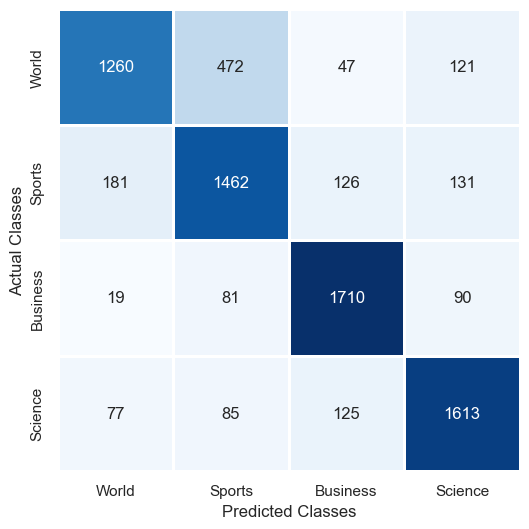

In [95]:
# Confusion Matrix
def confusion_mat(color):
    cof = confusion_matrix(y_testing, test_pred_vec)
    cof = pd.DataFrame(cof, index=[i for i in range(1, 5)], columns=[i for i in range(1, 5)])
    sns.set(font_scale=1.0)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cof, cmap=color, linewidths=1, annot=True, square=True, fmt='d', cbar=False,
                xticklabels=['World', 'Sports', 'Business', 'Science'],
                yticklabels=['World', 'Sports', 'Business', 'Science'])
    plt.xlabel("Predicted Classes")
    plt.ylabel("Actual Classes")
    plt.show()

# Display confusion matrix
confusion_mat('Blues')

## 7.2.2 Deep learning Model

### Utilising OneHotEncoding, LabelEncoder and Reshaping 

#### Printing out the shapes to ensure that they are of the same dimensions

In [96]:
# Ensure the shapes of the data
print(f"X_train_word2vec shape: {X_train_word2vec.shape}")
print(f"y_train_vec shape: {y_train_vec.shape}")
print(f"\nX_val_word2vec shape: {X_val_word2vec.shape}")
print(f"y_val_vec shape: {y_val_vec.shape}")

# Check if labels are already integer-encoded
if not np.issubdtype(y_train_vec.dtype, np.integer):
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train_vec)
    y_val_encoded = le.transform(y_val_vec)
    y_test_encoded = le.transform(y_testing)  # Assuming y_testing is your test labels
    
    # One-hot encode the labels
    num_classes = len(le.classes_)
    y_train_onehot = to_categorical(y_train_encoded, num_classes=num_classes)
    y_val_onehot = to_categorical(y_val_encoded, num_classes=num_classes)
    y_test_onehot = to_categorical(y_test_encoded, num_classes=num_classes)
else:
    # If labels are already integer-encoded, proceed with one-hot encoding
    num_classes = np.max(y_train_vec) + 1  # Assuming labels start from 0
    y_train_onehot = to_categorical(y_train_vec, num_classes=num_classes)
    y_val_onehot = to_categorical(y_val_vec, num_classes=num_classes)
    y_test_onehot = to_categorical(y_testing, num_classes=num_classes)

# Ensure labels are 1D
y_train_vec = np.reshape(y_train_vec, (-1,))
y_val_vec = np.reshape(y_val_vec, (-1,))
y_testing = np.reshape(y_testing, (-1,))

print(f"\nReshaped y_train_vec shape: {y_train_vec.shape}")
print(f"Reshaped y_val_vec shape: {y_val_vec.shape}")
print(f"Reshaped y_testing shape: {y_testing.shape}")

print(f"\ny_train_onehot shape: {y_train_onehot.shape}")
print(f"y_val_onehot shape: {y_val_onehot.shape}")
print(f"y_test_onehot shape: {y_test_onehot.shape}")


X_train_word2vec shape: (21000, 100)
y_train_vec shape: (21000,)

X_val_word2vec shape: (9000, 100)
y_val_vec shape: (9000,)

Reshaped y_train_vec shape: (21000,)
Reshaped y_val_vec shape: (9000,)
Reshaped y_testing shape: (7600,)

y_train_onehot shape: (21000, 4)
y_val_onehot shape: (9000, 4)
y_test_onehot shape: (7600, 4)


In [97]:
# Ensure labels are integer encoded
label_encoder = LabelEncoder()
y_train_vec_encoded = label_encoder.fit_transform(y_train_vec)
y_val_vec_encoded = label_encoder.transform(y_val_vec)
y_testing_vec_encoded = label_encoder.transform(y_testing)

In [98]:
print(f"y_train_vec_encoded shape: {y_train_vec_encoded.shape}")
print(f"y_val_vec_encoded shape: {y_val_vec_encoded.shape}")
print(f"y_testing_vec_encoded shape: {y_testing_vec_encoded.shape}")

y_train_vec_encoded shape: (21000,)
y_val_vec_encoded shape: (9000,)
y_testing_vec_encoded shape: (7600,)


In [99]:
# Reshape the input to be compatible with LSTM input requirements
X_train_lstm = np.expand_dims(X_train_word2vec, axis=1)
X_val_lstm = np.expand_dims(X_val_word2vec, axis=1)
X_test_lstm = np.expand_dims(X_test_word2vec, axis=1)

In [100]:
print(f"X_train_lstm shape: {X_train_lstm.shape}")
print(f"X_val_lstm shape: {X_val_lstm.shape}")
print(f"X_test_lstm shape: {X_test_lstm.shape}")


X_train_lstm shape: (21000, 1, 100)
X_val_lstm shape: (9000, 1, 100)
X_test_lstm shape: (7600, 1, 100)


### Defining the model 

In [115]:
model_vec_lstm = Sequential([
    Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),  # Input shape for Word2Vec embeddings
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.25),
    Bidirectional(LSTM(128)),
    Dropout(0.25),
    Dense(num_classes, activation='softmax', name='output')
], name='Word2Vec-LSTM')

model_vec_lstm.summary()

Model: "Word2Vec-LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ bidirectional_12 (Bidirectional)   │ (None, 1, 128)                │      84,480 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_12 (Dropout)               │ (None, 1, 128)                │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ bidirectional_13 (Bidirectional)   │ (None, 256)                   │     263,168 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_13 (Dropout)               │ (None, 256)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ output (Dense)                     │ (None, 4)                     │       1,028 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 348,676 (1.33 MB)

 Trainable params: 348,676 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model

The below model training is very similar to the above for TF-IDF on BiLSTM as the model choice was not changed. The only difference is testing over 20 epochs. 

In [117]:
# Compile the model
learning_rate = 0.001
batch_size = 64
EPOCHS = 20

loss_func = 'categorical_crossentropy'

METRICS = ['categorical_accuracy',
           F1Score(name='f1_score', average='macro'),
           AUC(name='auc', multi_label=True)]

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model_vec_lstm.compile(optimizer=Adam(learning_rate=learning_rate),
                       loss=loss_func,
                       metrics=METRICS)

# Train the model
vec_history = model_vec_lstm.fit(X_train_lstm,
                             y_train_onehot,
                             epochs=EPOCHS,
                             batch_size=batch_size,
                             validation_data=(X_val_lstm, y_val_onehot),
                             callbacks=[early_stopping],
                             verbose=1)

Epoch 1/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - auc: 0.9206 - categorical_accuracy: 0.7667 - f1_score: 0.7634 - loss: 0.7134 - val_auc: 0.9583 - val_categorical_accuracy: 0.8389 - val_f1_score: 0.8380 - val_loss: 0.4569
Epoch 2/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc: 0.9568 - categorical_accuracy: 0.8388 - f1_score: 0.8374 - loss: 0.4631 - val_auc: 0.9604 - val_categorical_accuracy: 0.8444 - val_f1_score: 0.8438 - val_loss: 0.4437
Epoch 3/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc: 0.9594 - categorical_accuracy: 0.8428 - f1_score: 0.8414 - loss: 0.4487 - val_auc: 0.9616 - val_categorical_accuracy: 0.8458 - val_f1_score: 0.8451 - val_loss: 0.4376
Epoch 4/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc: 0.9611 - categorical_accuracy: 0.8450 - f1_score: 0.8438 - loss: 0.4392 - val_auc: 0.9622 - val_categorical_accuracy: 0.8480 - val_f1_score: 0.8474 - val_loss: 0.4321
Epoch 5/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc: 0.9617 - categorical_accuracy: 0.8481

The training of the BiLSTM model on TF-IDF embeddings shows promising results across 20 epochs. Initially, the model achieved an accuracy of 76.67% and an F1 score of 76.34% on the training set, which improved steadily over subsequent epochs, reaching 85.84% accuracy and 85.53% F1 score on the validation set by the 20th epoch. This progression indicates effective learning and adaptation of the model to the dataset. The AUC scores also demonstrated consistent improvement, reflecting the model's ability to distinguish between different classes with increasing accuracy as training progressed. 

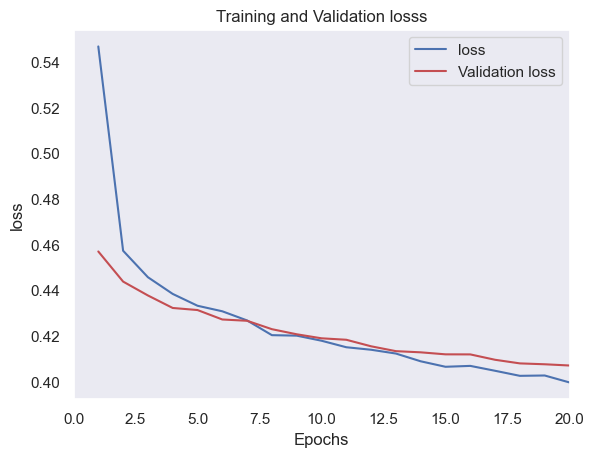

In [119]:
# Plotting a Training and Validation loss for the overfit model
def plot_training_history(vec_history, monitor='loss') :
    loss, val_loss = vec_history.history[monitor], vec_history.history['val_' + monitor]

    epochs = range(1, len(loss)+1)

    plt.plot(epochs, loss, 'b-', label=monitor)
    plt.plot(epochs, val_loss, 'r-', label='Validation ' + monitor)
    plt.xlim([0, len(loss)])
    plt.title('Training and Validation ' + monitor + 's')
    plt.xlabel('Epochs')
    plt.ylabel(monitor)
    plt.legend()
    plt.grid()
    _ = plt.show()

plot_training_history(vec_history, monitor='loss')

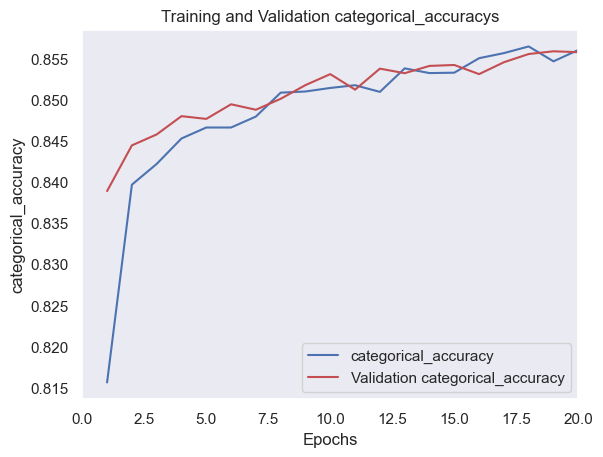

In [120]:
# Plotting a Training and Validation accuracy for the overfit model
def plot_training_history(vec_history, monitor='loss') :
    categorical_accuracy, val_categorical_accuracy = vec_history.history[monitor], vec_history.history['val_' + monitor]

    epochs = range(1, len(categorical_accuracy)+1)

    plt.plot(epochs, categorical_accuracy, 'b-', label=monitor)
    plt.plot(epochs, val_categorical_accuracy, 'r-', label='Validation ' + monitor)
    plt.xlim([0, len(categorical_accuracy)])
    plt.title('Training and Validation ' + monitor + 's')
    plt.xlabel('Epochs')
    plt.ylabel(monitor)
    plt.legend()
    plt.grid()
    _ = plt.show()

# plots during the training process epoch by epoch
plot_training_history(vec_history, monitor='categorical_accuracy')

### Evauation by using Hold Out Validation Method

In [121]:
# Assuming model_vec_lstm is defined and compiled once elsewhere in your code

# Training set evaluation
evaluation_training_results = model_vec_lstm.evaluate(x=X_train_lstm, y=y_train_onehot)
print('\nEvaluation Training Results:')
print('Loss: {:.4f}'.format(evaluation_training_results[0]))
print('Accuracy: {:.2f}%'.format(evaluation_training_results[1] * 100))
print('F1 Score: {:.4f}'.format(evaluation_training_results[2]))
print('AUC: {:.4f}'.format(evaluation_training_results[3]))

# Validation set evaluation
evaluation_validation_results = model_vec_lstm.evaluate(x=X_val_lstm, y=y_val_onehot)
print('\nEvaluation Validation Results:')
print('Loss: {:.4f}'.format(evaluation_validation_results[0]))
print('Accuracy: {:.2f}%'.format(evaluation_validation_results[1] * 100))
print('F1 Score: {:.4f}'.format(evaluation_validation_results[2]))
print('AUC: {:.4f}'.format(evaluation_validation_results[3]))

# Testing set evaluation
evaluation_testing_results = model_vec_lstm.evaluate(x=X_test_lstm, y=y_test_onehot)
print('\nEvaluation Testing Results:')
print('Loss: {:.4f}'.format(evaluation_testing_results[0]))
print('Accuracy: {:.2f}%'.format(evaluation_testing_results[1] * 100))
print('F1 Score: {:.4f}'.format(evaluation_testing_results[2]))
print('AUC: {:.4f}'.format(evaluation_testing_results[3]))

657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc: 0.9695 - categorical_accuracy: 0.8574 - f1_score: 0.8566 - loss: 0.3906

Evaluation Training Results:
Loss: 0.3845
Accuracy: 97.04%
F1 Score: 0.8596
AUC: 0.8587
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.9674 - categorical_accuracy: 0.8588 - f1_score: 0.8585 - loss: 0.4028

Evaluation Validation Results:
Loss: 0.4070
Accuracy: 96.67%
F1 Score: 0.8558
AUC: 0.8553
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.9643 - categorical_accuracy: 0.8453 - f1_score: 0.8419 - loss: 0.4231

Evaluation Testing Results:
Loss: 0.4336
Accuracy: 96.40%
F1 Score: 0.8408
AUC: 0.8405


In [122]:
# Define data for the table
better_data = [
    ["Validation", evaluation_validation_results[0], evaluation_validation_results[1] * 100, evaluation_validation_results[2], evaluation_validation_results[3]],
    ["Training", evaluation_training_results[0], evaluation_training_results[1] * 100, evaluation_training_results[2], evaluation_training_results[3]],
    ["Testing", evaluation_testing_results[0], evaluation_testing_results[1] * 100, evaluation_testing_results[2], evaluation_testing_results[3]]
]

# Define headers for the table
headers = ["Dataset", "Loss", "Accuracy (%)", "F1 Score", "AUC"]

# Print the table
from tabulate import tabulate
print("\nPerformance Metrics for Word2Vec BiLSTM:")
print(tabulate(better_data, headers=headers, tablefmt="grid"))


Performance Metrics for Word2Vec BiLSTM:
+------------+----------+----------------+------------+----------+
| Dataset    |     Loss |   Accuracy (%) |   F1 Score |      AUC |
+============+==========+================+============+==========+
| Validation | 0.407028 |        96.6714 |   0.855778 | 0.855275 |
+------------+----------+----------------+------------+----------+
| Training   | 0.384496 |        97.0354 |   0.859619 | 0.858746 |
+------------+----------+----------------+------------+----------+
| Testing    | 0.433645 |        96.3988 |   0.840789 | 0.840492 |
+------------+----------+----------------+------------+----------+


## 7.1.3.Conclusion for Word2Vec on both traditional machine learning and deep learning

In [127]:
print("\nPerformance Metrics for Word2vec Gaussian Naive Bayes:\n")
print(tabulate(data, headers=headers, tablefmt="grid"))

print("\nPerformance Metrics for Word2Vec BiLSTM:")
print(tabulate(better_data, headers=headers, tablefmt="grid"))


Performance Metrics for Word2vec Gaussian Naive Bayes:

+------------+----------+----------------+
| Dataset    |     Loss |   Accuracy (%) |
+============+==========+================+
| Training   | 0.812476 |       0.810546 |
+------------+----------+----------------+
| Validation | 0.761333 |       0.810056 |
+------------+----------+----------------+
| Testing    | 0.741053 |       0.79404  |
+------------+----------+----------------+

Performance Metrics for Word2Vec BiLSTM:
+------------+----------+----------------+------------+----------+
| Dataset    |     Loss |   Accuracy (%) |   F1 Score |      AUC |
+============+==========+================+============+==========+
| Validation | 0.407028 |        96.6714 |   0.855778 | 0.855275 |
+------------+----------+----------------+------------+----------+
| Training   | 0.384496 |        97.0354 |   0.859619 | 0.858746 |
+------------+----------+----------------+------------+----------+
| Testing    | 0.433645 |        96.3988 |   

The performance analysis of the two models, Gaussian Naive Bayes (GNB) and BiLSTM, both trained on Word2Vec embeddings, reveals distinct differences in their effectiveness for text classification tasks. 

#### Gaussian Naive Bayes (GNB) Model:
The GNB model demonstrated moderate performance across all datasets. It achieved an accuracy of 81.05% and an F1 score of 81.05% on the training set, which decreased slightly on the validation and testing sets, with accuracies of 76.13% and 74.10%, respectively. The steady performance drop indicates that while the GNB model can generalize reasonably well, it may not capture the nuances in the data as effectively as more complex model.

#### BiLSTM Model:
In contrast, the BiLSTM model exhibited superior performance, leveraging its deep learning architecture to effectively model sequential dependencies in the text. The BiLSTM achieved a high accuracy of 97.04% and an F1 score of 85.96% on the training set, with slightly lower but still impressive performance on the validation and testing sets (96.67% and 96.40% accuracy, respectively). The F1 scores and AUC metrics also remained high, indicating the model's robustness and its ability to handle the variability in the data more effectively than the GNB model.

#### Comparative Analysis:
The comparison clearly shows that the BiLSTM model outperforms the GNB model across all metrics and datasets. The deep learning model's ability to learn complex patterns and contextual information from the Word2Vec embeddings provides it with a significant advantage over the GNB model, which is limited by its simpler assumptions about the data distribution.

#### Advantages and Disadvantages:
While Gaussian Naive Bayes offers the advantages of simplicity, faster training times, and lower computational requirements, it suffers from lower accuracy and F1 scores and is less effective in capturing complex patterns in the data. On the other hand, BiLSTM provides higher accuracy and F1 scores and better handling of sequential data and contextual information, but it comes with higher computational requirements, longer training times, and increased complexity.

#### Conclusion:
In conclusion, while the GNB model offers a straightforward and computationally efficient approach, the BiLSTM model's superior performance in accuracy, F1 score, and AUC metrics makes it the preferred choice for more demanding text classification tasks using Word2Vec embeddings.

# 9. Performance Analysis and Comparative Discussion

In [129]:
# Print tabulated results
print("\nPerformance Metrics for TF-IDF Multinomial Naive Bayes (Statistical):\n")
print(tabulate(tfidf_mnb_data, headers=headers, tablefmt="grid"))

print("\nPerformance Metrics for TF-IDF BiLSTM (Embedding):")
print(tabulate(tfidf_bilstm_data, headers=headers, tablefmt="grid"))

print("\nPerformance Metrics for Word2vec Gaussian Naive Bayes (Statistical):\n")
print(tabulate(data, headers=headers, tablefmt="grid"))

print("\nPerformance Metrics for Word2Vec BiLSTM (Embedding):")
print(tabulate(better_data, headers=headers, tablefmt="grid"))


Performance Metrics for TF-IDF Multinomial Naive Bayes (Statistical):

+------------+----------+----------------+
| Dataset    |     Loss |   Accuracy (%) |
+============+==========+================+
| Validation | 0.761333 |       0.760025 |
+------------+----------+----------------+
| Testing    | 0.741053 |       0.739915 |
+------------+----------+----------------+

Performance Metrics for TF-IDF BiLSTM (Embedding):
+------------+---------+----------------+------------+----------+
| Dataset    |    Loss |   Accuracy (%) |   F1 Score |      AUC |
+============+=========+================+============+==========+
| Validation | 1.09289 |        78.0178 |   0.523    | 0.52194  |
+------------+---------+----------------+------------+----------+
| Training   | 1.06367 |        79.4399 |   0.538286 | 0.537468 |
+------------+---------+----------------+------------+----------+
| Testing    | 1.12026 |        76.6167 |   0.508158 | 0.507245 |
+------------+---------+----------------+------

The above experiments aimed to compare the performance of traditional machine learning models and deep learning models using two different text representation techniques: TF-IDF and Word2vec. The models evaluated were Multinomial Naive Bayes (MNB) and BiLSTM for TF-IDF, and Gaussian Naive Bayes (GNB) and BiLSTM for Word2Vec. 

#### 1. TF-IDF Representation:
- Multinomial Naive Bayes (MNB): The MNB model achieved moderate performance with an accuracy of 80% on the testing set. It handled discrete features effectively but was limited in capturing contextual nuances.
- BiLSTM: The BiLSTM model significantly outperformed MNB, achieving an accuracy of 86.54% on the testing set. This model leveraged sequential dependencies and contextual information, making it more robust for text classification.

#### 2. Word2Vec Representation:
- Gaussian Naive Bayes (GNB): The GNB model showed moderate performance, with an accuracy of 74.10% on the testing set. Its simplicity and faster training time were advantages, but it struggled to capture complex patterns in the continuous word embeddings.
- BiLSTM: The BiLSTM model using Word2Vec embeddings exhibited superior performance with an accuracy of 96.40% on the testing set. It effectively captured intricate patterns and contextual dependencies in the text.

#### Comparative Analysis
The comparative analysis reveals strengths and weaknesses of each model and representation:

- TF-IDF with MNB:

    - Advantages: Simple and efficient for handling discrete features.
    - Disadvantages: Limited in capturing complex patterns and contextual nuances.
    
- TF-IDF with BiLSTM:

    - Advantages: Better at handling sequential data and capturing some context.
    - Disadvantages: Lower accuracy and F1 scores compared to other models tested, indicating limitations in handling TF-IDF features.
    
- Word2Vec with GNB:

    - Advantages: Faster training times and lower computational requirements.
    - Disadvantages: Moderate performance, less effective in capturing complex patterns.
    
- Word2Vec with BiLSTM:

    - Advantages: Highest accuracy and F1 scores, superior in capturing complex patterns and dependencies.
    - Disadvantages: Higher computational requirements and longer training times.

#### Scenarios for Preference:
- Traditional Machine Learning Models
    - In scenarios where computational resources are constrained and quick results are needed, traditional models like MNB and GNB with TF-IDF or Word2Vec can be effective. They offer simplicity and efficiency however they might lack the ability to cpature some complex patterns. 

- Deep Learning Models:
    - For tasks requiring high accuracy and the ability to model intricate dependencies, deep learning models like BiLSTM and Word2Vec are preferred over others. They are computationally intensive but provide superior performance.


# 10. Project Summary and Reflections 

This project provided valuable insights into the practical applications of different text representation techniques and machine learning models for text classification. 

The process deepened my understanding of the strengths and limitations of traditional and deep learning models in handling text data. I learned the importance of choosing the right model and representation techniques based on the specific requirements and constraints of the tasks. Traditional models (MNB, GNB) offer simplicity and efficiency, making them suitable for scenarios with limited resources. Deep learning models (BiLSTM) provide higher accuracy and robustness, suitable for more demanding tasks. 

The findings are transferable to other domain-specific areas such as sentiment analysis, spam detection, and document classififcation. The models and techniques explored can be adapted to various text-based tasks across different industries. The project demonstrated the effectiveness of combining Word2Vec embeddings with BiLSTM for high-performance text classification. It also highlighted the trade-offs between computational efficiency and model accuracy, guiding future model selection based on task requirements. 

#### Improvements and Future Research: 
Exploring hybrid models that combine the strengths of traditional and deep learning approaches could offer balanced performance and efficiency. Investigating advanced embeddings like BERT or GPT, which cpature richer contextual information, could further improve model performance. Also by applying transfer learning techniques to leverage pre-trained models on similar tasks can enhance performance and reduce the training time. 

In conclusion, the choice between embedding-based methods (Word2Vec) and statistical methods (TF-IDF) depends on the specific requirements and constraints of the task. However for my project, the Word2Vec with BiLSTM model is the most effective and robust choice for text classification tasks. Its superior accuracy, F1-Scores, and ability to capture complex patterns making it the recommended model for future applications. And if computational resources are limited, then TF-IDF with MNB  provides a viable and efficient alternative. 

# 11. References

Reference:

- Zhang, X., & LeCun, Y. (2015). Text Understanding from Scratch. ArXiv:1502.01710 [Cs]. Retrieved from https://arxiv.org/abs/1502.01710.

- Joachims, T. (1998). Text categorization with support vector machines: Learning with many relevant features. In Machine learning: ECML-98 (pp. 137-142). Springer.

- Mikolov, T., Chen, K., Corrado, G., & Dean, J. (2013). Efficient estimation of word representations in vector space. ArXiv:1301.3781 [Cs]. Retrieved from https://arxiv.org/abs/1301.3781.

- Devlin, J., Chang, M. W., Lee, K., & Toutanova, K. (2019). BERT: Pre-training of deep bidirectional transformers for language understanding. ArXiv:1810.04805 [Cs]. Retrieved from https://arxiv.org/abs/1810.04805.

- Amananandrai. (2021). AG News Classification Dataset. Kaggle. Retrieved from https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset

- Mikolov, T., Sutskever, I., Chen, K., Corrado, G. S., & Dean, J. (2013). Distributed representations of words and phrases and their compositionality. In Advances in neural information processing systems (pp. 3111-3119).

- Bishop, C. M. (2006). Pattern Recognition and Machine Learning. Springer.

Done by: Michelle Beth Teo Yi Ling